In [1]:
### use contrastive_rl kernel
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [98]:
env = gym.make('CartPole-v1', render_mode='rgb_array')

In [99]:
print('Actions:')
print(env.action_space)

Actions:
Discrete(2)


In [100]:
env.action_space.sample()

1

In [101]:
print('Observations:')
print('shape:', env.observation_space.shape)
print('low:', env.observation_space.low)
print('high:', env.observation_space.high)

Observations:
shape: (4,)
low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
high: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [102]:
s, _ = env.reset()

In [103]:
s

array([ 0.0084478 ,  0.03009586, -0.03637523, -0.03221602], dtype=float32)

In [104]:
a = 0
s, r, done, _, _ = env.step(a)

In [105]:
s

array([ 0.00904972, -0.16448608, -0.03701955,  0.24877186], dtype=float32)

In [106]:
r

1.0

In [107]:
done

False

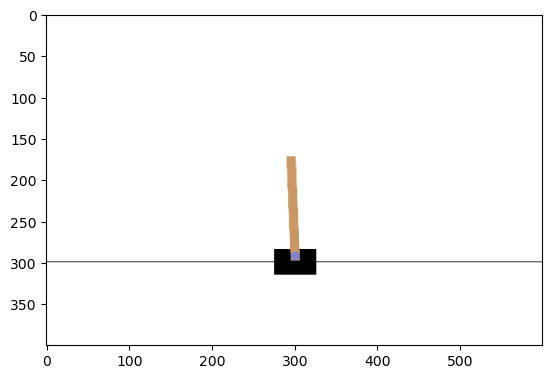

In [108]:
plt.imshow(env.render())
plt.show()

Total reward: 99.3


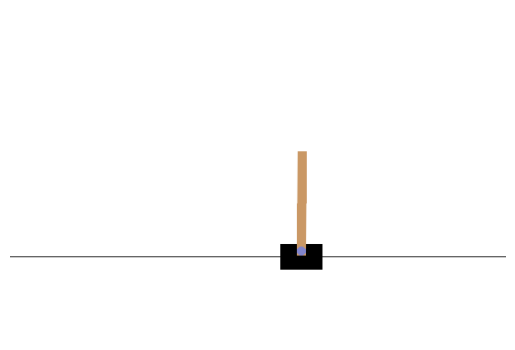

In [109]:
def policy(observation):
  action = np.random.choice([0, 1])
  LEFT, RIGHT = 0, 1
  cart_pos, cart_vel, pole_angle, pole_angular_vel = observation

  # TODO:
  if pole_angle + pole_angular_vel < 0:
    action = LEFT
  else:
    action = RIGHT
  
  return action
  
discount = 0.99
done = False
total_reward = 0


img = plt.imshow(env.render())
def render():
  rgb = env.render()
  if done:
    rgb[:, :, 1:] = rgb[:, :, 1:] / 2
  img.set_data(rgb) 
  plt.axis('off')
  display.display(plt.gcf())
  display.clear_output(wait=True)


s, _ = env.reset()
for t in range(env._max_episode_steps):
#   print(t)
  action = policy(s)
  s, r, done, _, _ = env.step(action)
  render()
  total_reward += (discount**t) * r
  if done:
    break
print('Total reward: %.1f' % total_reward)

------------------------
# Acrobot

Total reward: -99.3


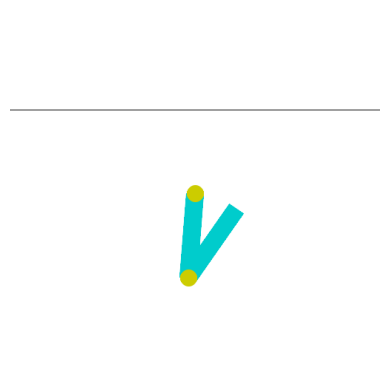

In [110]:
env = gym.make('Acrobot-v1', render_mode='rgb_array')
env.reset()

### Plotting code -- ignore this
img = plt.imshow(env.render())
def render():
  rgb = env.render()
  if done:
    rgb[:, :, 1:] = rgb[:, :, 1:] / 2
  img.set_data(rgb) 
  plt.axis('off')
  display.display(plt.gcf())
  display.clear_output(wait=True)
  
### Interaction loop
obs, _ = env.reset()
done = False
total_reward = 0
discount = 0.99
for t in range(env._max_episode_steps):
  action = env.action_space.sample()
  obs, reward, done, _, _ = env.step(action)
  total_reward += discount**t * reward
  render()
  if done:
    break
print('Total reward: %.1f' % total_reward)